In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2d Data Comparison

In [6]:
column_names = [
    "x",
    "z",
    "r",
    "theta",
    "alpha",
    "psi",
    "q",
    "betak",
    "betat",
    "dbetatdr",
    "dbetatdt",
    "He",
    "Hf",
    "Omega",
    "b2",
    "rho",
]
df_2d_100k = pd.read_csv("/data/sjammi6/thesisproject/data/2D_data_100000/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)
df_2d_10k = pd.read_csv("/data/sjammi6/thesisproject/data/2D_data/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)
df_2d_1k = pd.read_csv("/data/sjammi6/thesisproject/data/2D_data/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)

In [7]:
column_names[4:]

['alpha',
 'psi',
 'q',
 'betak',
 'betat',
 'dbetatdr',
 'dbetatdt',
 'He',
 'Hf',
 'Omega',
 'b2',
 'rho']

In [8]:
df_2d_1k["phi"] = np.float64(0.0)
df_2d_1k["y"] = np.float64(0.0)
df_2d_1k["gxx"] = (df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q)) * (
    ((df_2d_1k.x / df_2d_1k.r) ** 2) + ((df_2d_1k.z * np.cos(df_2d_1k.phi) / df_2d_1k.r) ** 2)
) + np.sin(df_2d_1k.phi) ** 2 * df_2d_1k.psi**4
df_2d_1k["gxy"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (df_2d_1k.x * df_2d_1k.y / df_2d_1k.r**2 + df_2d_1k.z**2 * np.cos(df_2d_1k.phi) * np.sin(df_2d_1k.phi) / df_2d_1k.r**2)
    - np.sin(df_2d_1k.phi) * np.cos(df_2d_1k.phi) * df_2d_1k.psi**4
)
df_2d_1k["gxz"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (
        df_2d_1k.x * df_2d_1k.z / df_2d_1k.r**2
        - df_2d_1k.z * np.cos(df_2d_1k.phi) * np.sqrt(df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    )
)
df_2d_1k["gyy"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (df_2d_1k.y**2 / df_2d_1k.r**2 + df_2d_1k.z**2 * np.sin(df_2d_1k.phi) ** 2 / df_2d_1k.r**2)
    + np.cos(df_2d_1k.phi) ** 2 * df_2d_1k.psi**4
)
df_2d_1k["gyz"] = (
    df_2d_1k.psi**4
    * np.exp(2 * df_2d_1k.q)
    * (
        df_2d_1k.y * df_2d_1k.z / df_2d_1k.r**2
        - df_2d_1k.z * np.sin(df_2d_1k.phi) * np.sqrt(df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    )
)
df_2d_1k["gzz"] = (
    df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q) * (df_2d_1k.x**2 + df_2d_1k.y**2) / df_2d_1k.r**2
    + df_2d_1k.psi**4 * np.exp(2 * df_2d_1k.q) * df_2d_1k.z**2 / df_2d_1k.r**2
)
df_2d_1k_new_xplane = df_2d_1k[((df_2d_1k.theta == dict(df_2d_1k.theta.describe())["max"])) & (df_2d_1k.phi == np.float64(0))]
df_2d_1k_new_xplane

,x,z,r,theta,alpha,psi,q,betak,betat,dbetatdr,...,b2,rho,phi,y,gxx,gxy,gxz,gyy,gyz,gzz
201,0.300000,1.836970e-17,0.300000,1.570796,0.000000,2.589687,-2.145527e-01,-2.368790e-01,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,29.284046,0.0,0.0,44.976864,0.0,29.284046
403,0.306000,1.873710e-17,0.306000,1.570796,0.005905,2.564224,-2.145199e-01,-2.368421e-01,-3.578127e-09,-4.800713e-06,...,0.0,0.0,0.0,0.0,28.151046,0.0,0.0,43.233871,0.0,28.151046
605,0.312060,1.910816e-17,0.312060,1.570796,0.011753,2.539358,-2.144201e-01,-2.367319e-01,-5.840364e-08,-2.431721e-05,...,0.0,0.0,0.0,0.0,27.080245,0.0,0.0,41.581055,0.0,27.080245
807,0.318181,1.948294e-17,0.318181,1.570796,0.017547,2.515066,-2.142565e-01,-2.365507e-01,-3.016363e-07,-7.396758e-05,...,0.0,0.0,0.0,0.0,26.067317,0.0,0.0,40.012640,0.0,26.067317
1009,0.324362,1.986147e-17,0.324362,1.570796,0.023290,2.491327,-2.140320e-01,-2.363006e-01,-9.725936e-07,-1.222421e-04,...,0.0,0.0,0.0,0.0,25.108309,0.0,0.0,38.523281,0.0,25.108309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161195,1668.046118,1.021384e-13,1668.046118,1.570796,0.999065,1.000468,-3.275616e-07,-3.867179e-11,-1.307311e-09,2.334660e-12,...,0.0,0.0,0.0,0.0,1.001872,0.0,0.0,1.001873,0.0,1.001872
161397,1684.729579,1.031599e-13,1684.729579,1.570796,0.999074,1.000463,-3.209212e-07,-2.856718e-11,-1.269139e-09,2.243607e-12,...,0.0,0.0,0.0,0.0,1.001853,0.0,0.0,1.001854,0.0,1.001853
161599,1701.579875,1.041917e-13,1701.579875,1.570796,0.999083,1.000459,-3.144078e-07,-1.875944e-11,-1.232089e-09,2.156104e-12,...,0.0,0.0,0.0,0.0,1.001835,0.0,0.0,1.001836,0.0,1.001835
161801,1718.598674,1.052338e-13,1718.598674,1.570796,0.999092,1.000454,-3.080189e-07,-9.239859e-12,-1.196128e-09,2.072014e-12,...,0.0,0.0,0.0,0.0,1.001817,0.0,0.0,1.001818,0.0,1.001817


In [9]:
df_2d_10k["phi"] = np.float64(0.0)
df_2d_10k["y"] = np.float64(0.0)
df_2d_10k["gxx"] = (df_2d_10k.psi**4 * np.exp(2 * df_2d_10k.q)) * (
    ((df_2d_10k.x / df_2d_10k.r) ** 2) + ((df_2d_10k.z * np.cos(df_2d_10k.phi) / df_2d_10k.r) ** 2)
) + np.sin(df_2d_10k.phi) ** 2 * df_2d_10k.psi**4
df_2d_10k["gxy"] = (
    df_2d_10k.psi**4
    * np.exp(2 * df_2d_10k.q)
    * (df_2d_10k.x * df_2d_10k.y / df_2d_10k.r**2 + df_2d_10k.z**2 * np.cos(df_2d_10k.phi) * np.sin(df_2d_10k.phi) / df_2d_10k.r**2)
    - np.sin(df_2d_10k.phi) * np.cos(df_2d_10k.phi) * df_2d_10k.psi**4
)
df_2d_10k["gxz"] = (
    df_2d_10k.psi**4
    * np.exp(2 * df_2d_10k.q)
    * (
        df_2d_10k.x * df_2d_10k.z / df_2d_10k.r**2
        - df_2d_10k.z * np.cos(df_2d_10k.phi) * np.sqrt(df_2d_10k.x**2 + df_2d_10k.y**2) / df_2d_10k.r**2
    )
)
df_2d_10k["gyy"] = (
    df_2d_10k.psi**4
    * np.exp(2 * df_2d_10k.q)
    * (df_2d_10k.y**2 / df_2d_10k.r**2 + df_2d_10k.z**2 * np.sin(df_2d_10k.phi) ** 2 / df_2d_10k.r**2)
    + np.cos(df_2d_10k.phi) ** 2 * df_2d_10k.psi**4
)
df_2d_10k["gyz"] = (
    df_2d_10k.psi**4
    * np.exp(2 * df_2d_10k.q)
    * (
        df_2d_10k.y * df_2d_10k.z / df_2d_10k.r**2
        - df_2d_10k.z * np.sin(df_2d_10k.phi) * np.sqrt(df_2d_10k.x**2 + df_2d_10k.y**2) / df_2d_10k.r**2
    )
)
df_2d_10k["gzz"] = (
    df_2d_10k.psi**4 * np.exp(2 * df_2d_10k.q) * (df_2d_10k.x**2 + df_2d_10k.y**2) / df_2d_10k.r**2
    + df_2d_10k.psi**4 * np.exp(2 * df_2d_10k.q) * df_2d_10k.z**2 / df_2d_10k.r**2
)
df_2d_10k_new_xplane = df_2d_10k[((df_2d_10k.theta == dict(df_2d_10k.theta.describe())["max"])) & (df_2d_10k.phi == np.float64(0))]
df_2d_10k_new_xplane

,x,z,r,theta,alpha,psi,q,betak,betat,dbetatdr,...,b2,rho,phi,y,gxx,gxy,gxz,gyy,gyz,gzz
201,0.300000,1.836970e-17,0.300000,1.570796,0.000000,2.589687,-2.145527e-01,-2.368790e-01,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,29.284046,0.0,0.0,44.976864,0.0,29.284046
403,0.306000,1.873710e-17,0.306000,1.570796,0.005905,2.564224,-2.145199e-01,-2.368421e-01,-3.578127e-09,-4.800713e-06,...,0.0,0.0,0.0,0.0,28.151046,0.0,0.0,43.233871,0.0,28.151046
605,0.312060,1.910816e-17,0.312060,1.570796,0.011753,2.539358,-2.144201e-01,-2.367319e-01,-5.840364e-08,-2.431721e-05,...,0.0,0.0,0.0,0.0,27.080245,0.0,0.0,41.581055,0.0,27.080245
807,0.318181,1.948294e-17,0.318181,1.570796,0.017547,2.515066,-2.142565e-01,-2.365507e-01,-3.016363e-07,-7.396758e-05,...,0.0,0.0,0.0,0.0,26.067317,0.0,0.0,40.012640,0.0,26.067317
1009,0.324362,1.986147e-17,0.324362,1.570796,0.023290,2.491327,-2.140320e-01,-2.363006e-01,-9.725936e-07,-1.222421e-04,...,0.0,0.0,0.0,0.0,25.108309,0.0,0.0,38.523281,0.0,25.108309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161195,1668.046118,1.021384e-13,1668.046118,1.570796,0.999065,1.000468,-3.275616e-07,-3.867179e-11,-1.307311e-09,2.334660e-12,...,0.0,0.0,0.0,0.0,1.001872,0.0,0.0,1.001873,0.0,1.001872
161397,1684.729579,1.031599e-13,1684.729579,1.570796,0.999074,1.000463,-3.209212e-07,-2.856718e-11,-1.269139e-09,2.243607e-12,...,0.0,0.0,0.0,0.0,1.001853,0.0,0.0,1.001854,0.0,1.001853
161599,1701.579875,1.041917e-13,1701.579875,1.570796,0.999083,1.000459,-3.144078e-07,-1.875944e-11,-1.232089e-09,2.156104e-12,...,0.0,0.0,0.0,0.0,1.001835,0.0,0.0,1.001836,0.0,1.001835
161801,1718.598674,1.052338e-13,1718.598674,1.570796,0.999092,1.000454,-3.080189e-07,-9.239859e-12,-1.196128e-09,2.072014e-12,...,0.0,0.0,0.0,0.0,1.001817,0.0,0.0,1.001818,0.0,1.001817


In [10]:
df_2d_100k["phi"] = np.float64(0.0)
df_2d_100k["y"] = np.float64(0.0)
df_2d_100k["gxx"] = (df_2d_100k.psi**4 * np.exp(2 * df_2d_100k.q)) * (
    ((df_2d_100k.x / df_2d_100k.r) ** 2) + ((df_2d_100k.z * np.cos(df_2d_100k.phi) / df_2d_100k.r) ** 2)
) + np.sin(df_2d_100k.phi) ** 2 * df_2d_100k.psi**4
df_2d_100k["gxy"] = (
    df_2d_100k.psi**4
    * np.exp(2 * df_2d_100k.q)
    * (df_2d_100k.x * df_2d_100k.y / df_2d_100k.r**2 + df_2d_100k.z**2 * np.cos(df_2d_100k.phi) * np.sin(df_2d_100k.phi) / df_2d_100k.r**2)
    - np.sin(df_2d_100k.phi) * np.cos(df_2d_100k.phi) * df_2d_100k.psi**4
)
df_2d_100k["gxz"] = (
    df_2d_100k.psi**4
    * np.exp(2 * df_2d_100k.q)
    * (
        df_2d_100k.x * df_2d_100k.z / df_2d_100k.r**2
        - df_2d_100k.z * np.cos(df_2d_100k.phi) * np.sqrt(df_2d_100k.x**2 + df_2d_100k.y**2) / df_2d_100k.r**2
    )
)
df_2d_100k["gyy"] = (
    df_2d_100k.psi**4
    * np.exp(2 * df_2d_100k.q)
    * (df_2d_100k.y**2 / df_2d_100k.r**2 + df_2d_100k.z**2 * np.sin(df_2d_100k.phi) ** 2 / df_2d_100k.r**2)
    + np.cos(df_2d_100k.phi) ** 2 * df_2d_100k.psi**4
)
df_2d_100k["gyz"] = (
    df_2d_100k.psi**4
    * np.exp(2 * df_2d_100k.q)
    * (
        df_2d_100k.y * df_2d_100k.z / df_2d_100k.r**2
        - df_2d_100k.z * np.sin(df_2d_100k.phi) * np.sqrt(df_2d_100k.x**2 + df_2d_100k.y**2) / df_2d_100k.r**2
    )
)
df_2d_100k["gzz"] = (
    df_2d_100k.psi**4 * np.exp(2 * df_2d_100k.q) * (df_2d_100k.x**2 + df_2d_100k.y**2) / df_2d_100k.r**2
    + df_2d_100k.psi**4 * np.exp(2 * df_2d_100k.q) * df_2d_100k.z**2 / df_2d_100k.r**2
)
df_2d_100k_new_xplane = df_2d_100k[((df_2d_100k.theta == dict(df_2d_100k.theta.describe())["max"])) & (df_2d_100k.phi == np.float64(0))]
df_2d_100k_new_xplane

,x,z,r,theta,alpha,psi,q,betak,betat,dbetatdr,...,b2,rho,phi,y,gxx,gxy,gxz,gyy,gyz,gzz
201,0.300000,1.836970e-17,0.300000,1.570796,0.000000,2.589687,-2.145527e-01,-2.368790e-01,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,29.284046,0.0,0.0,44.976864,0.0,29.284046
403,0.306000,1.873710e-17,0.306000,1.570796,0.005905,2.564224,-2.145199e-01,-2.368421e-01,-3.578127e-09,-4.800713e-06,...,0.0,0.0,0.0,0.0,28.151046,0.0,0.0,43.233871,0.0,28.151046
605,0.312060,1.910816e-17,0.312060,1.570796,0.011753,2.539358,-2.144201e-01,-2.367319e-01,-5.840364e-08,-2.431721e-05,...,0.0,0.0,0.0,0.0,27.080245,0.0,0.0,41.581055,0.0,27.080245
807,0.318181,1.948294e-17,0.318181,1.570796,0.017547,2.515066,-2.142565e-01,-2.365507e-01,-3.016363e-07,-7.396758e-05,...,0.0,0.0,0.0,0.0,26.067317,0.0,0.0,40.012640,0.0,26.067317
1009,0.324362,1.986147e-17,0.324362,1.570796,0.023290,2.491327,-2.140320e-01,-2.363006e-01,-9.725936e-07,-1.222421e-04,...,0.0,0.0,0.0,0.0,25.108309,0.0,0.0,38.523281,0.0,25.108309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161195,1668.046118,1.021384e-13,1668.046118,1.570796,0.999065,1.000468,-3.275616e-07,-3.867179e-11,-1.307311e-09,2.334660e-12,...,0.0,0.0,0.0,0.0,1.001872,0.0,0.0,1.001873,0.0,1.001872
161397,1684.729579,1.031599e-13,1684.729579,1.570796,0.999074,1.000463,-3.209212e-07,-2.856718e-11,-1.269139e-09,2.243607e-12,...,0.0,0.0,0.0,0.0,1.001853,0.0,0.0,1.001854,0.0,1.001853
161599,1701.579875,1.041917e-13,1701.579875,1.570796,0.999083,1.000459,-3.144078e-07,-1.875944e-11,-1.232089e-09,2.156104e-12,...,0.0,0.0,0.0,0.0,1.001835,0.0,0.0,1.001836,0.0,1.001835
161801,1718.598674,1.052338e-13,1718.598674,1.570796,0.999092,1.000454,-3.080189e-07,-9.239859e-12,-1.196128e-09,2.072014e-12,...,0.0,0.0,0.0,0.0,1.001817,0.0,0.0,1.001818,0.0,1.001817


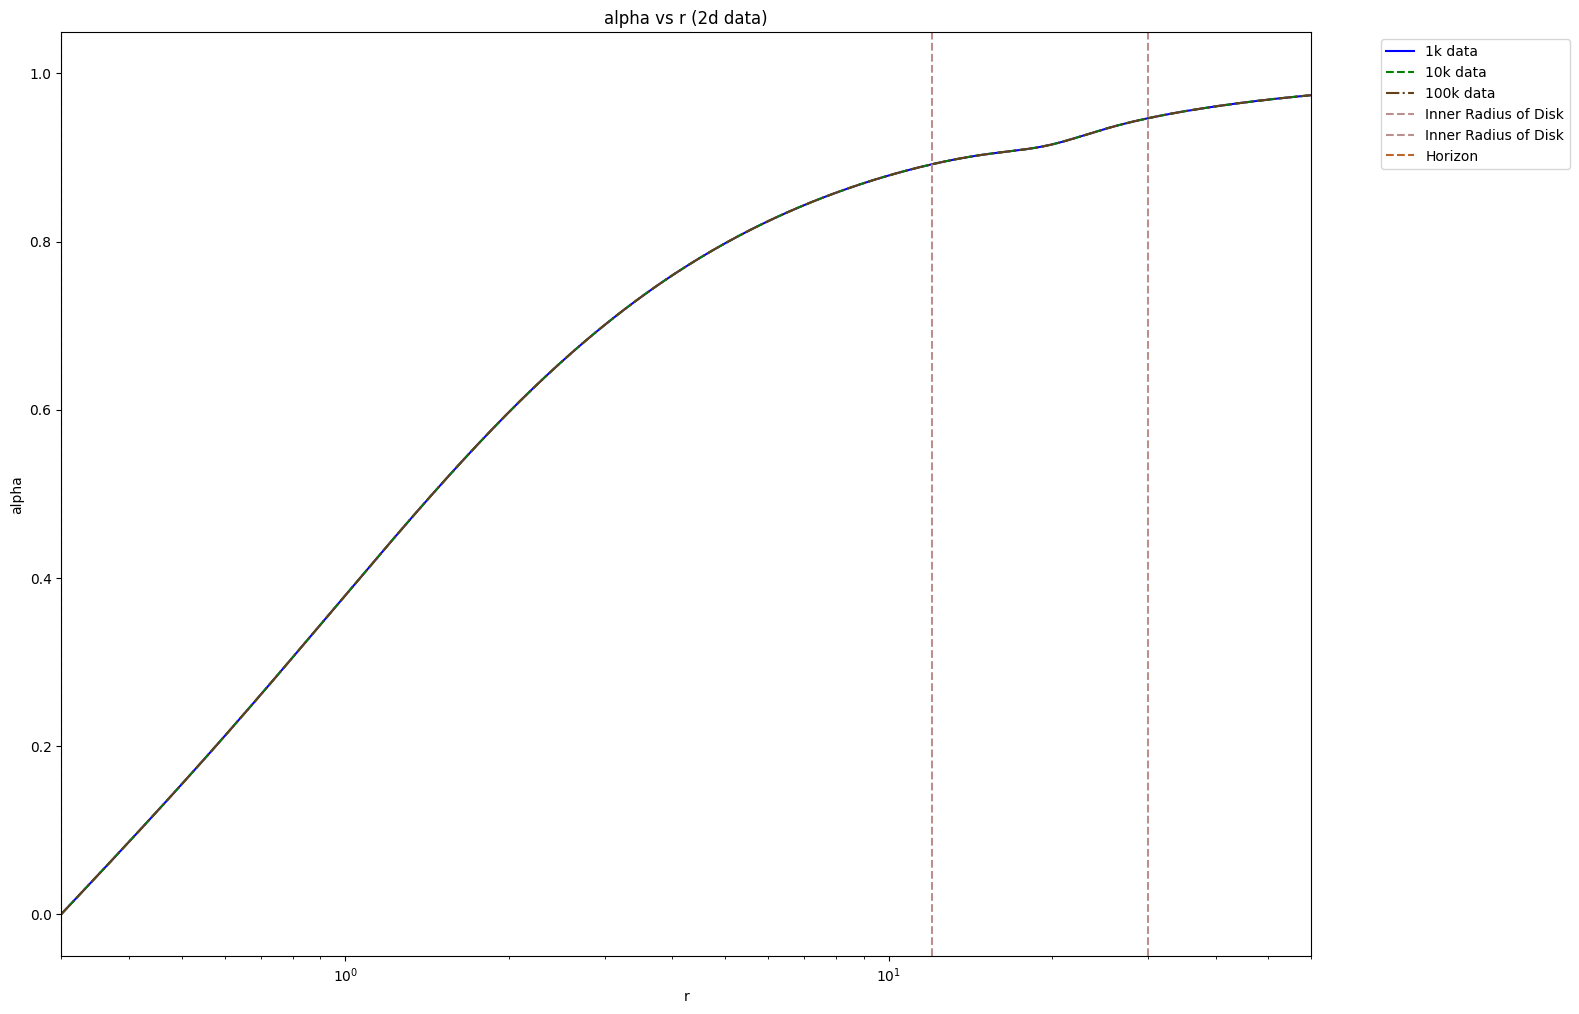

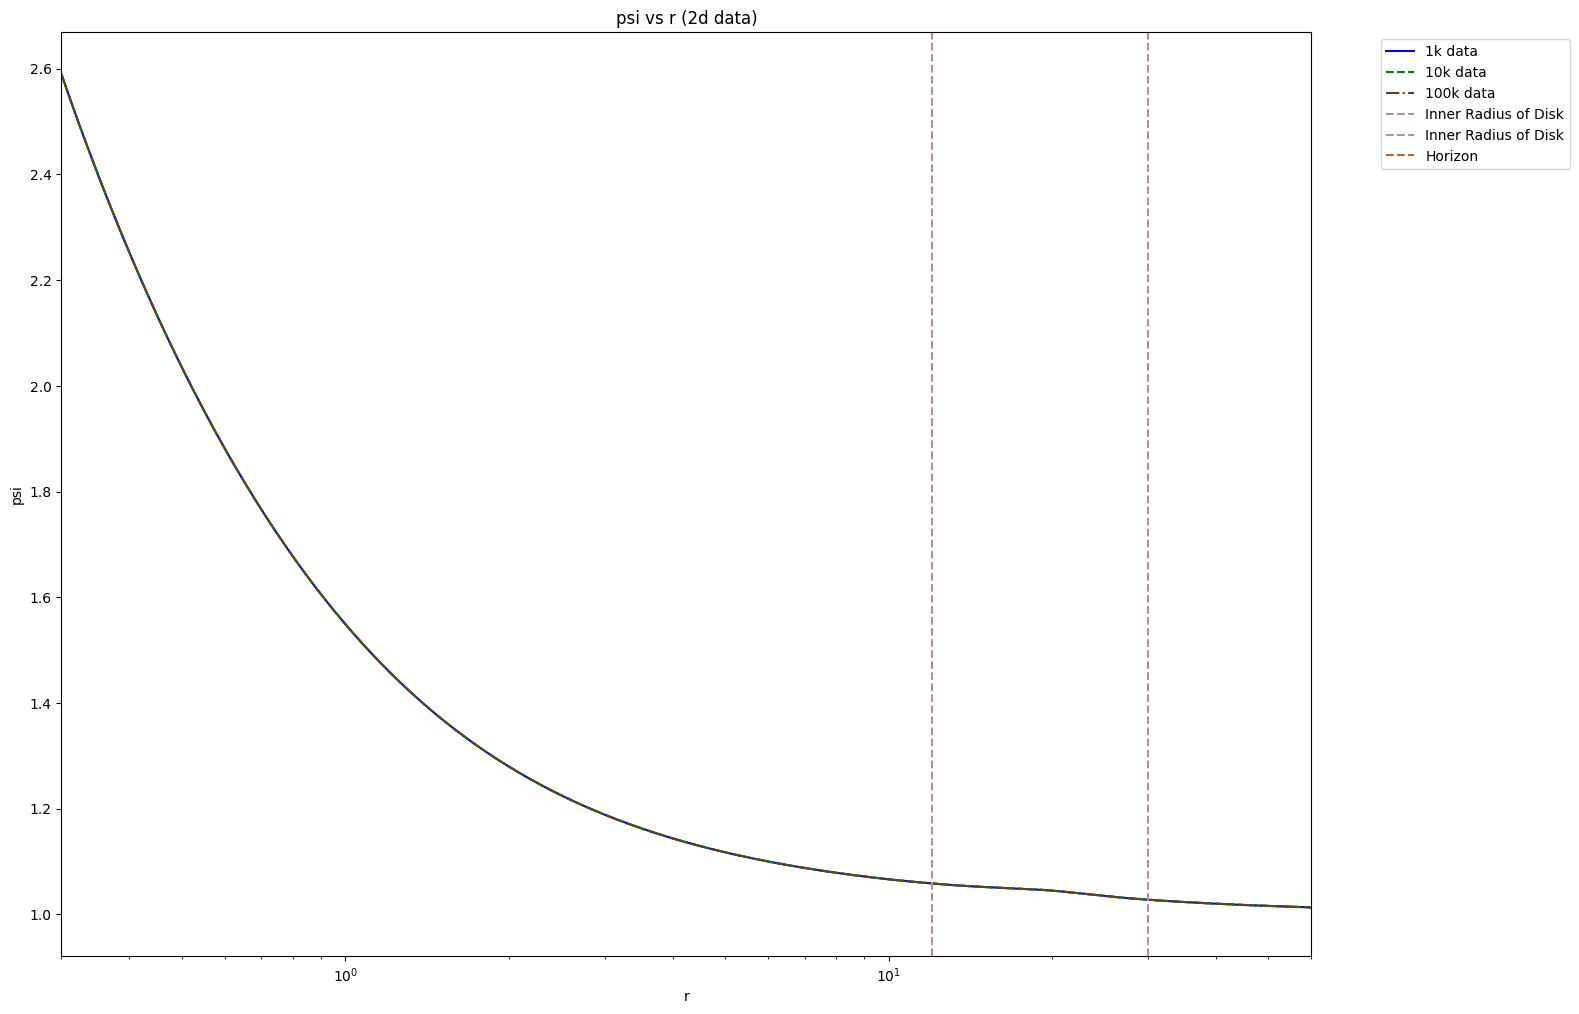

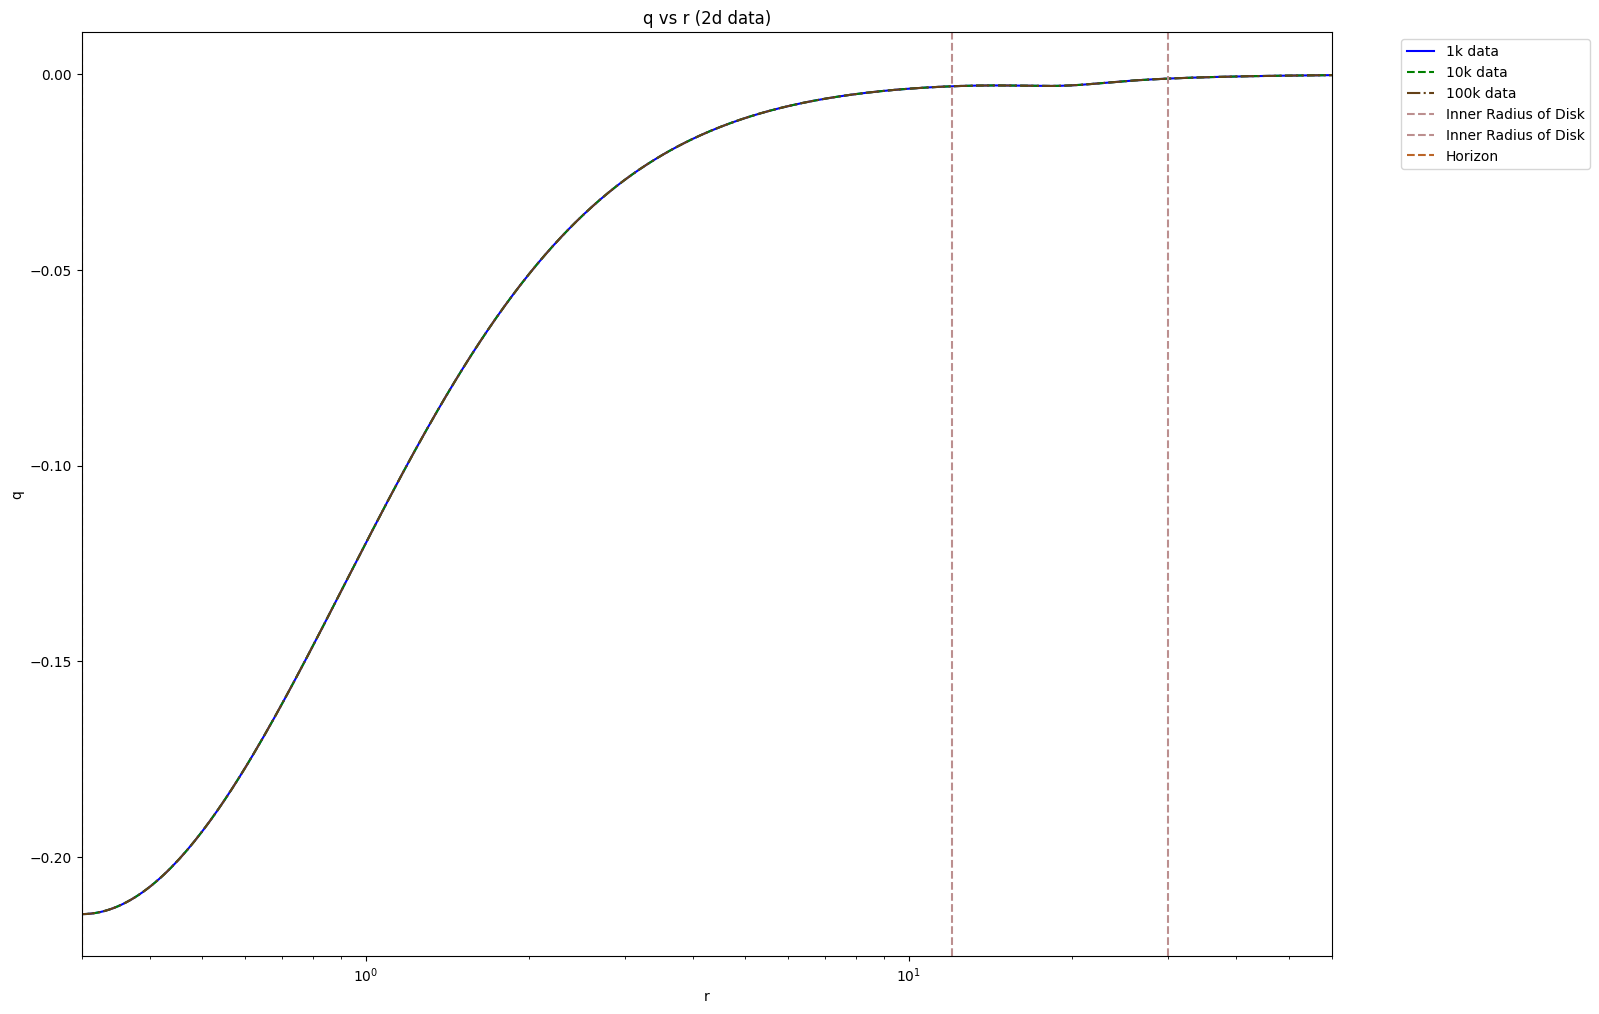

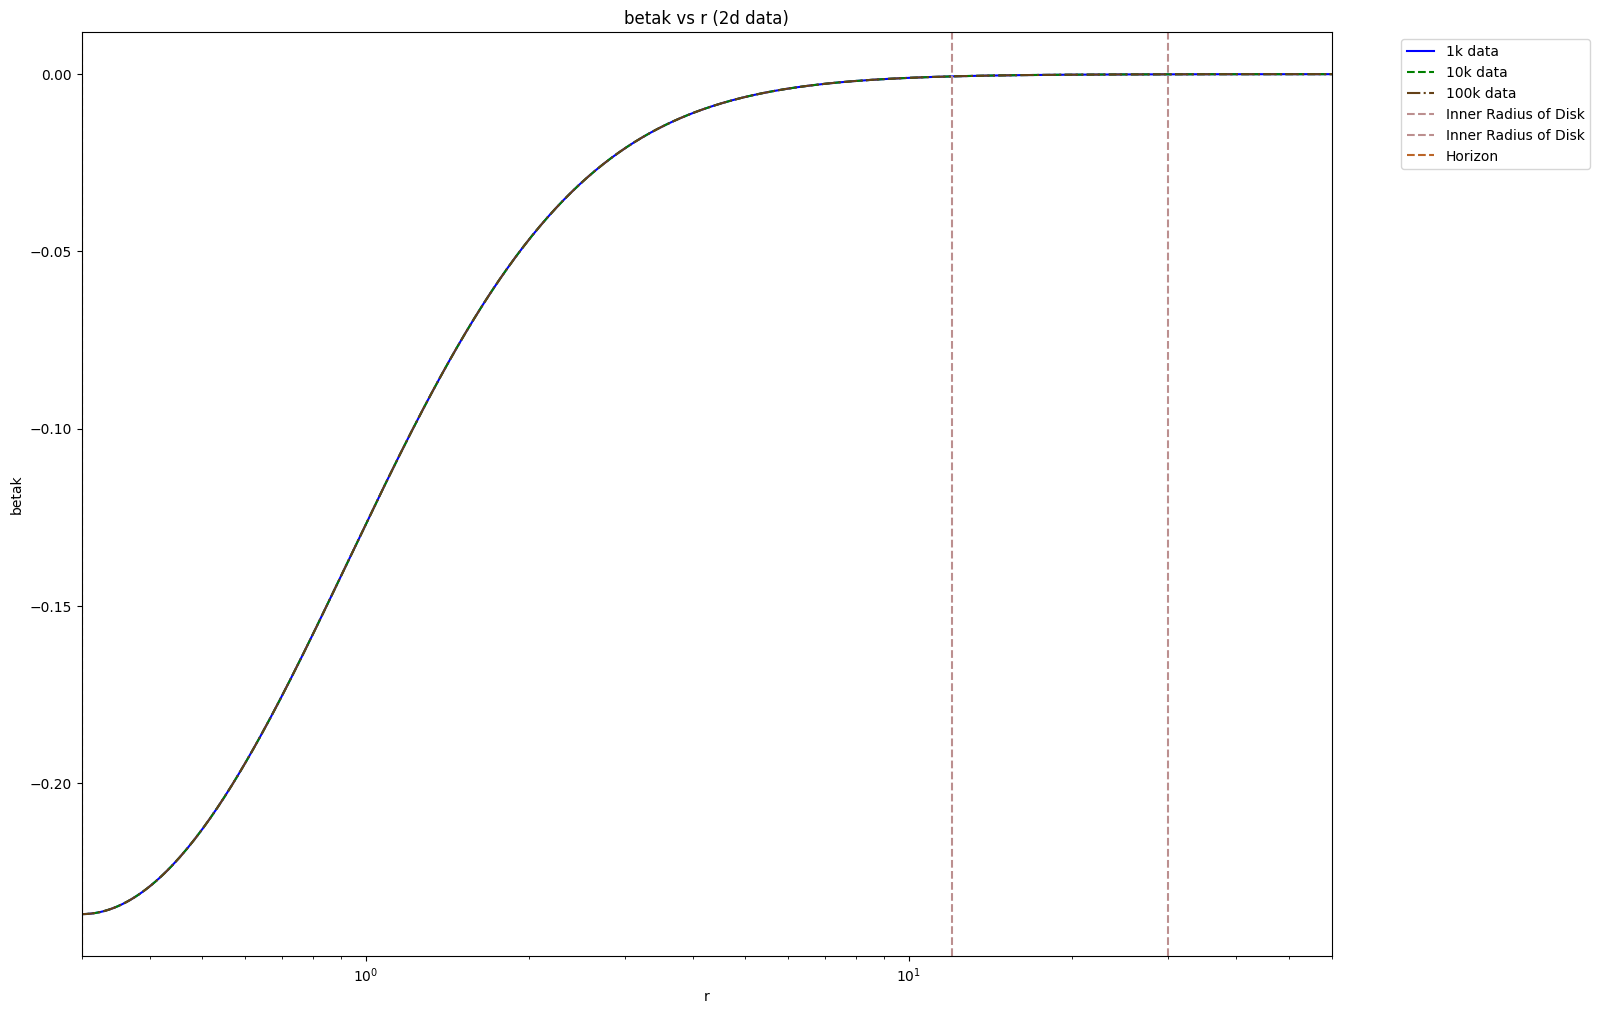

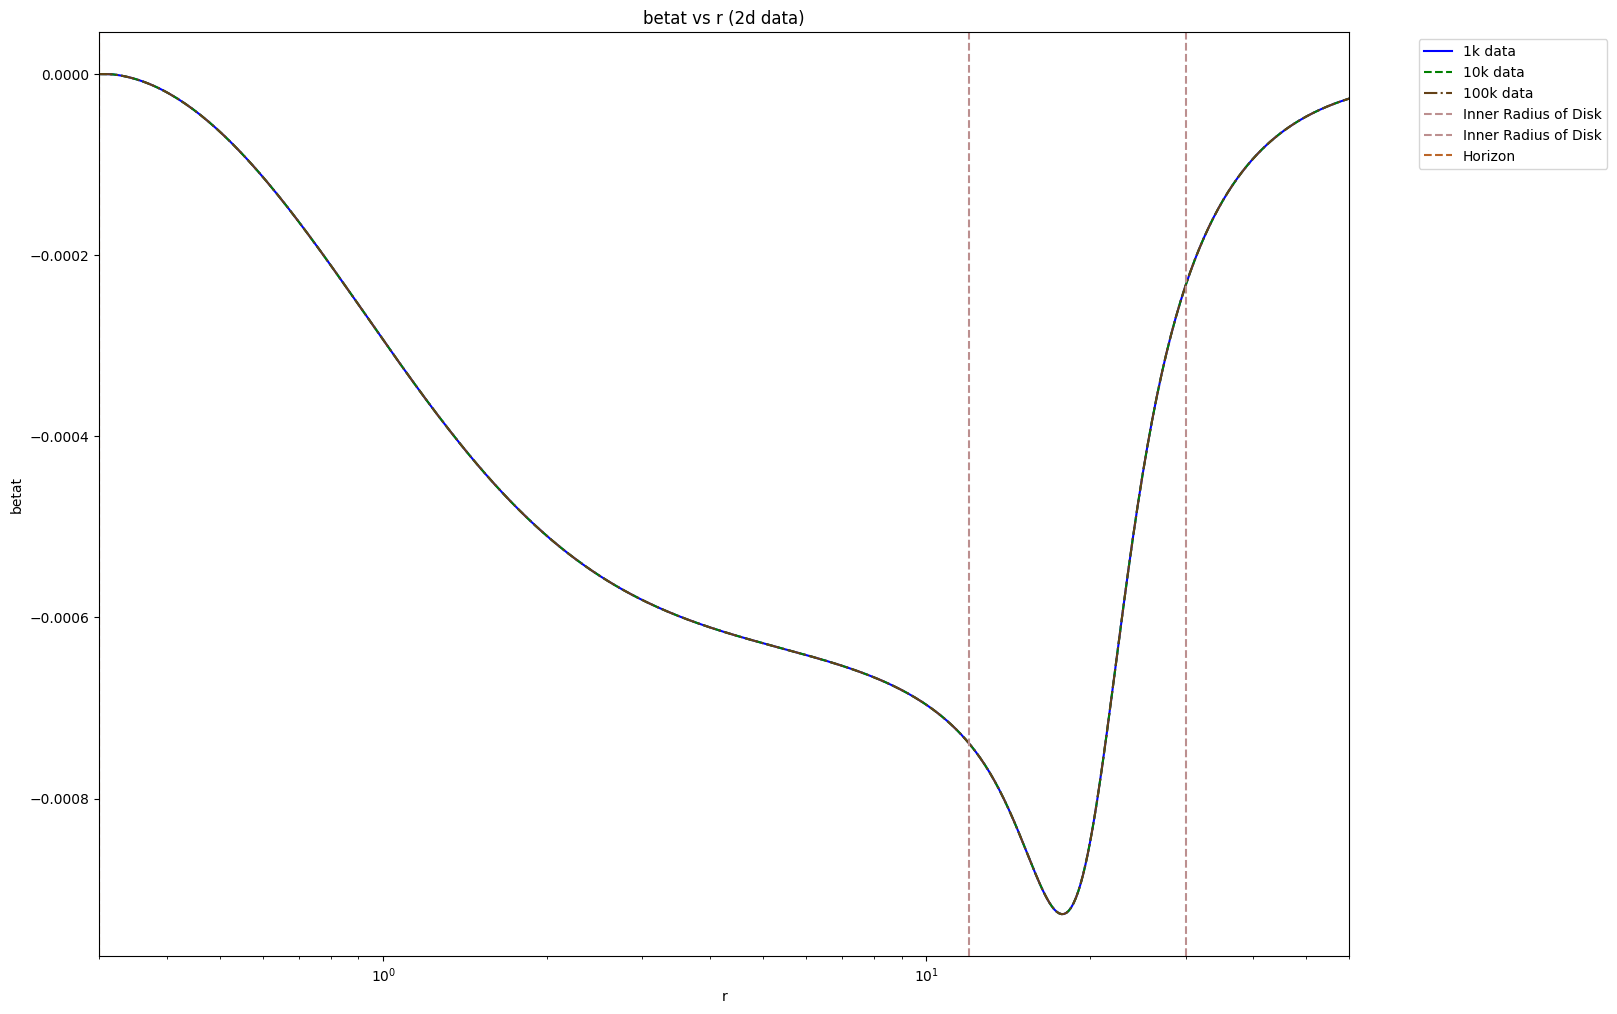

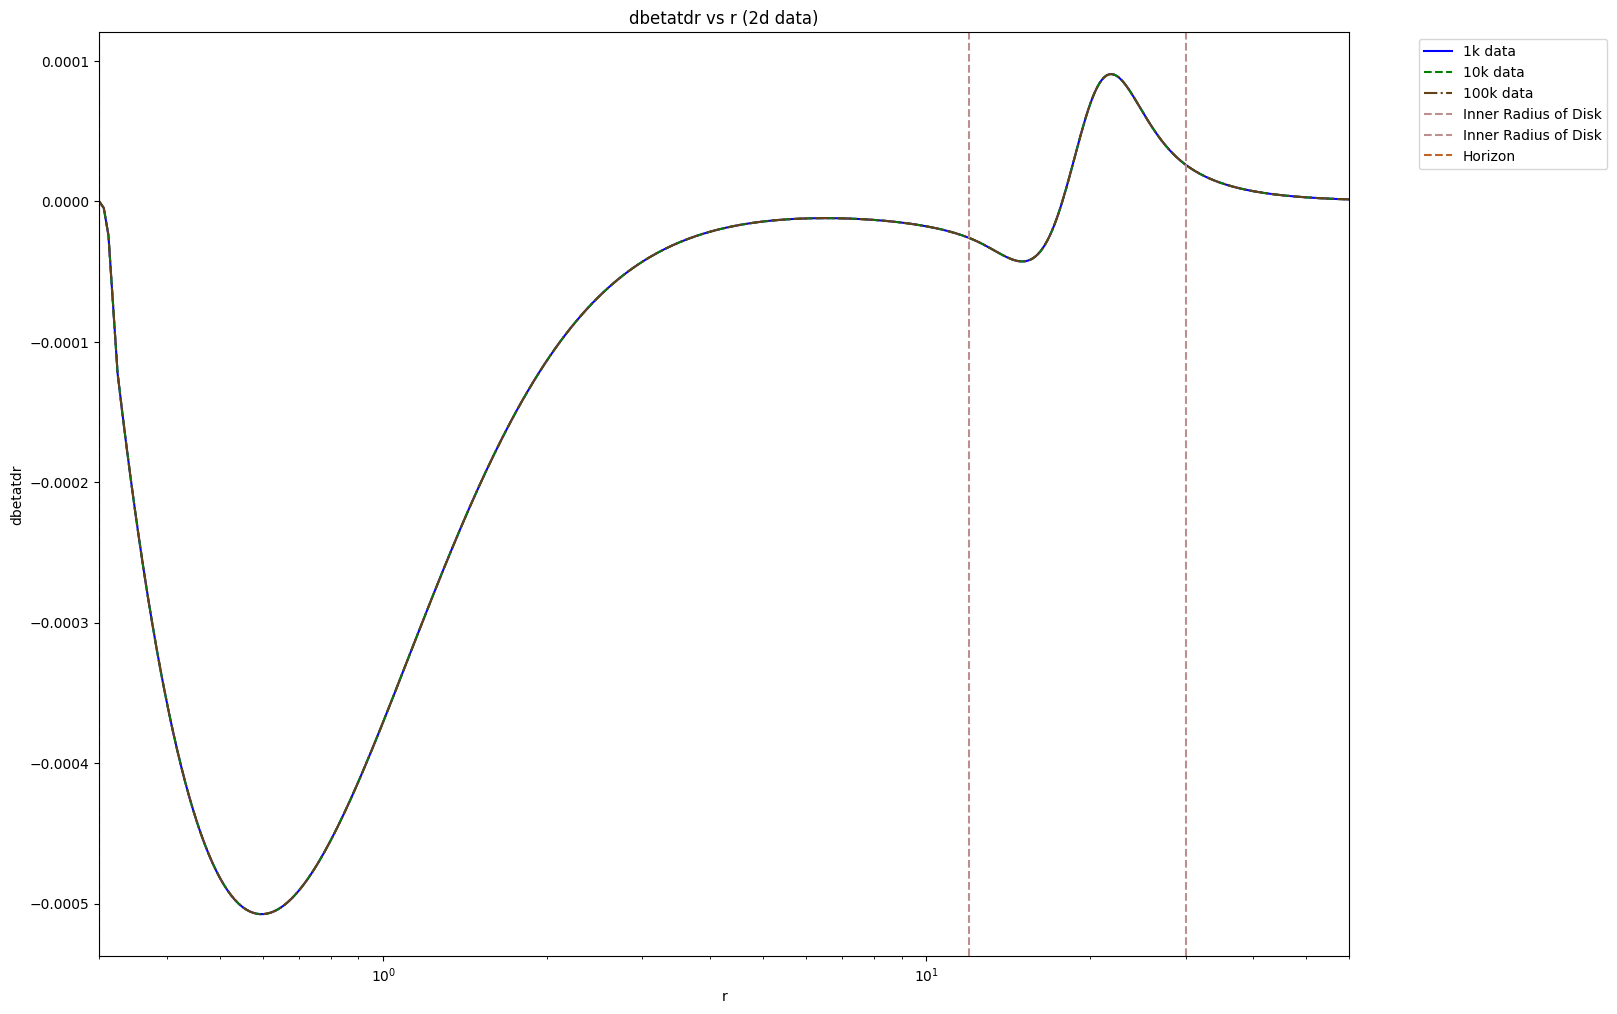

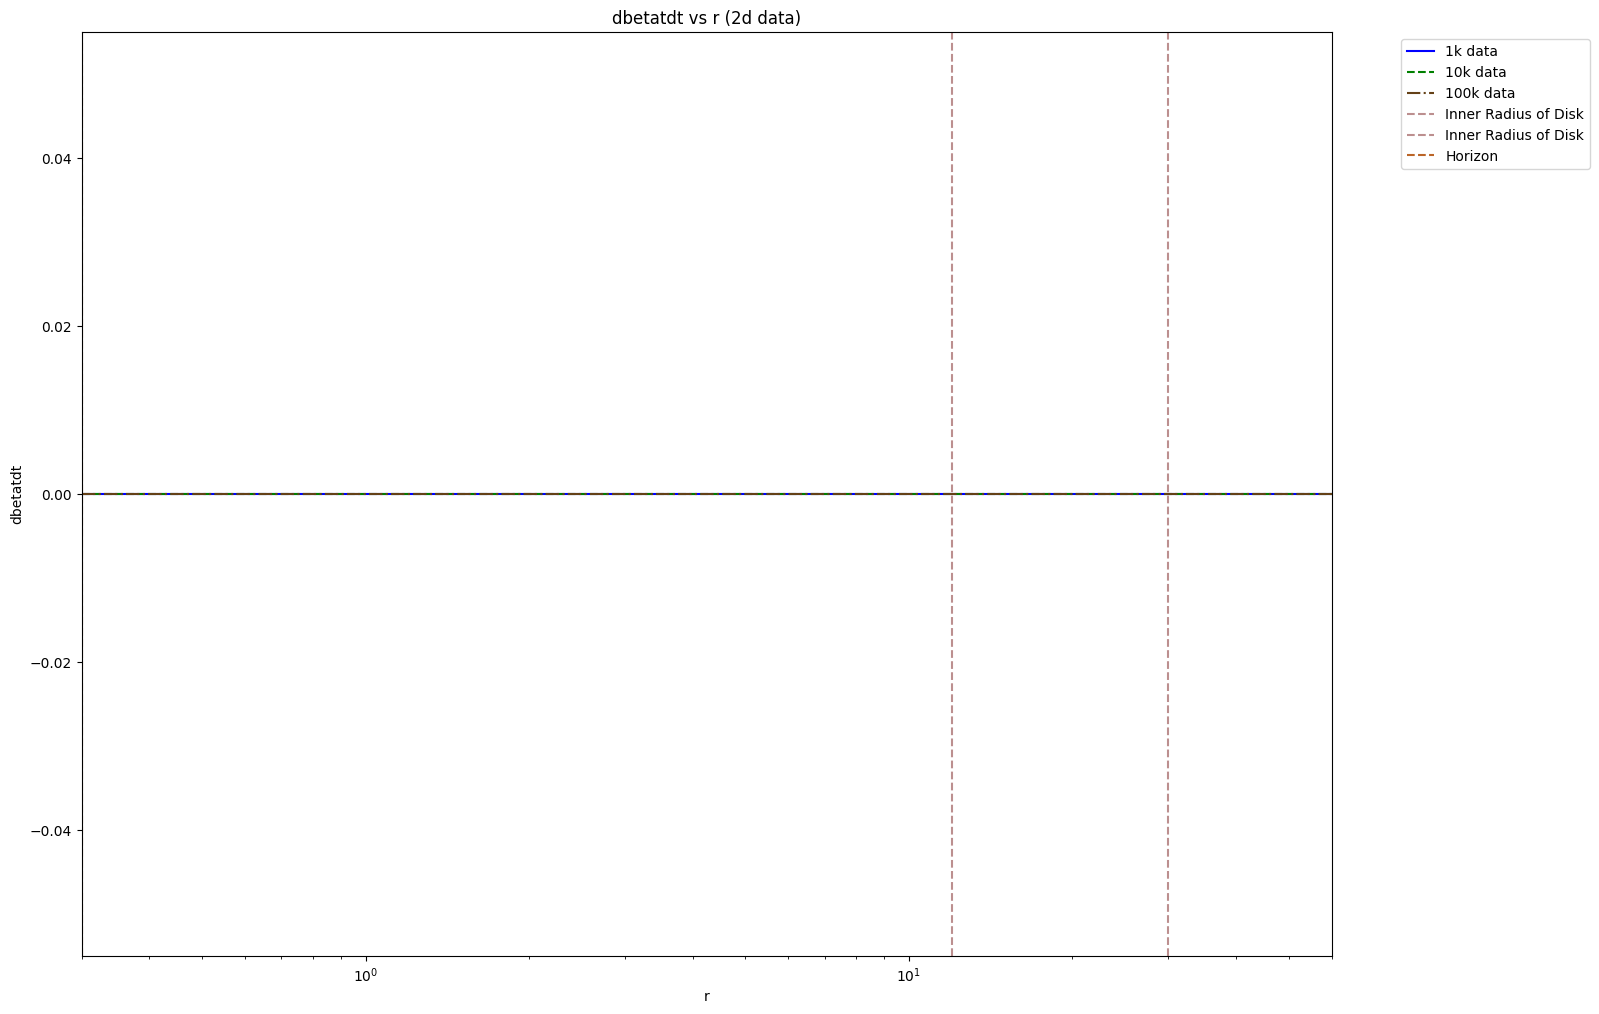

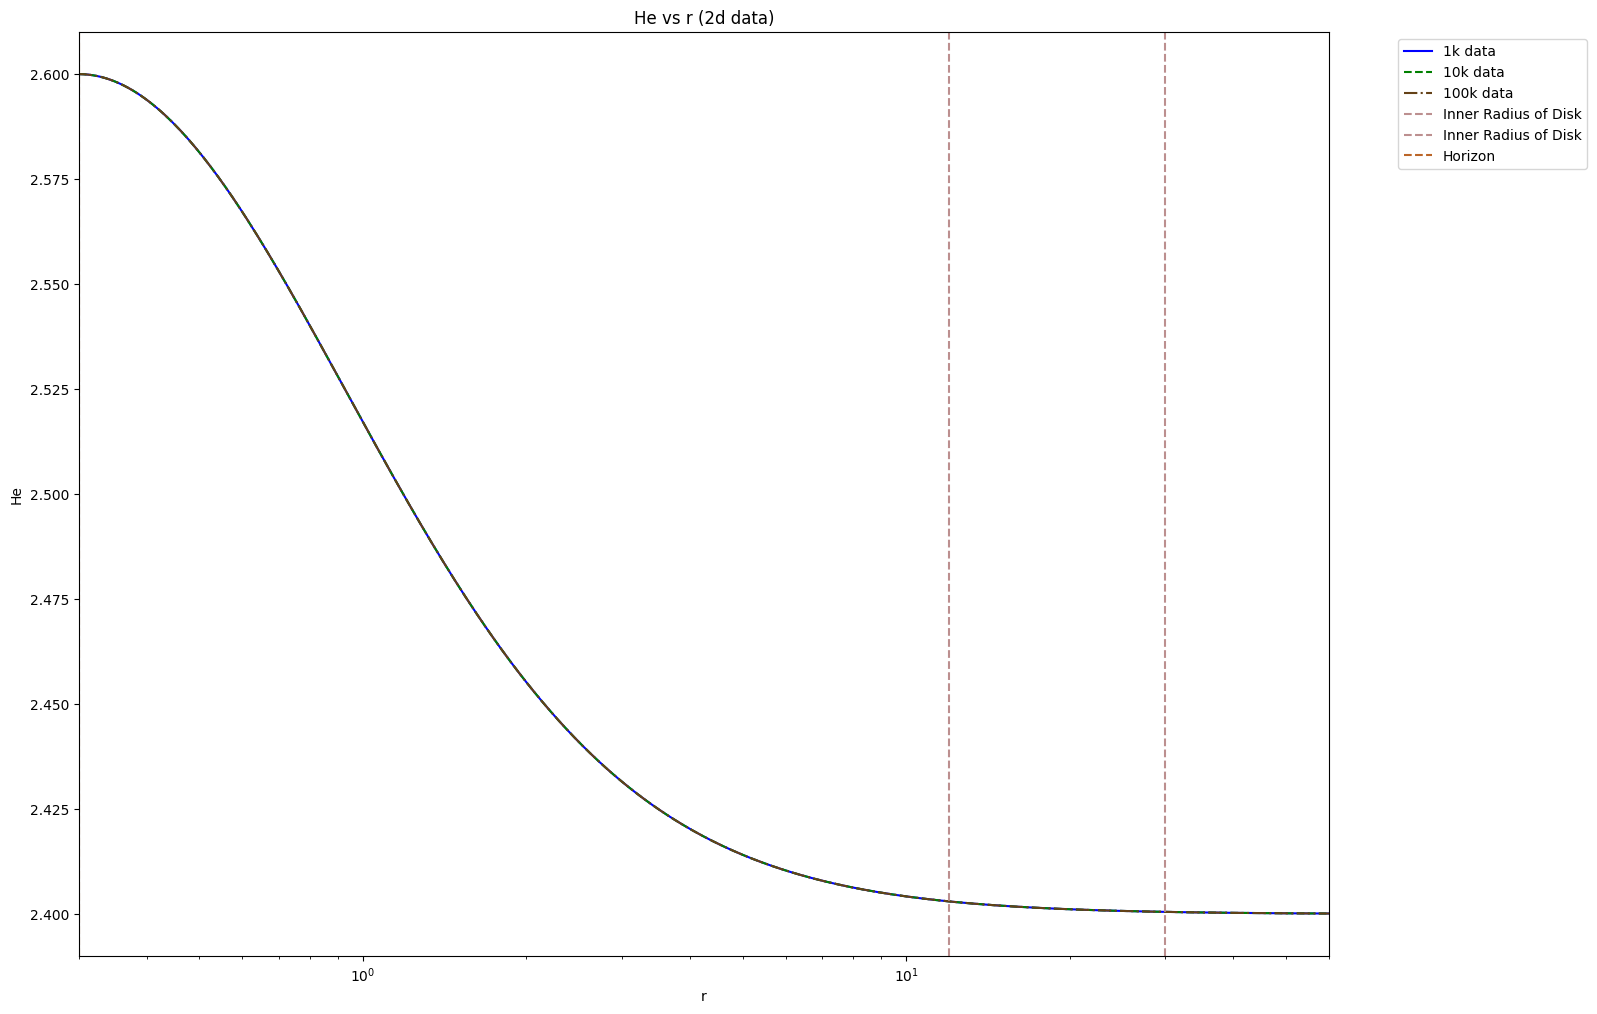

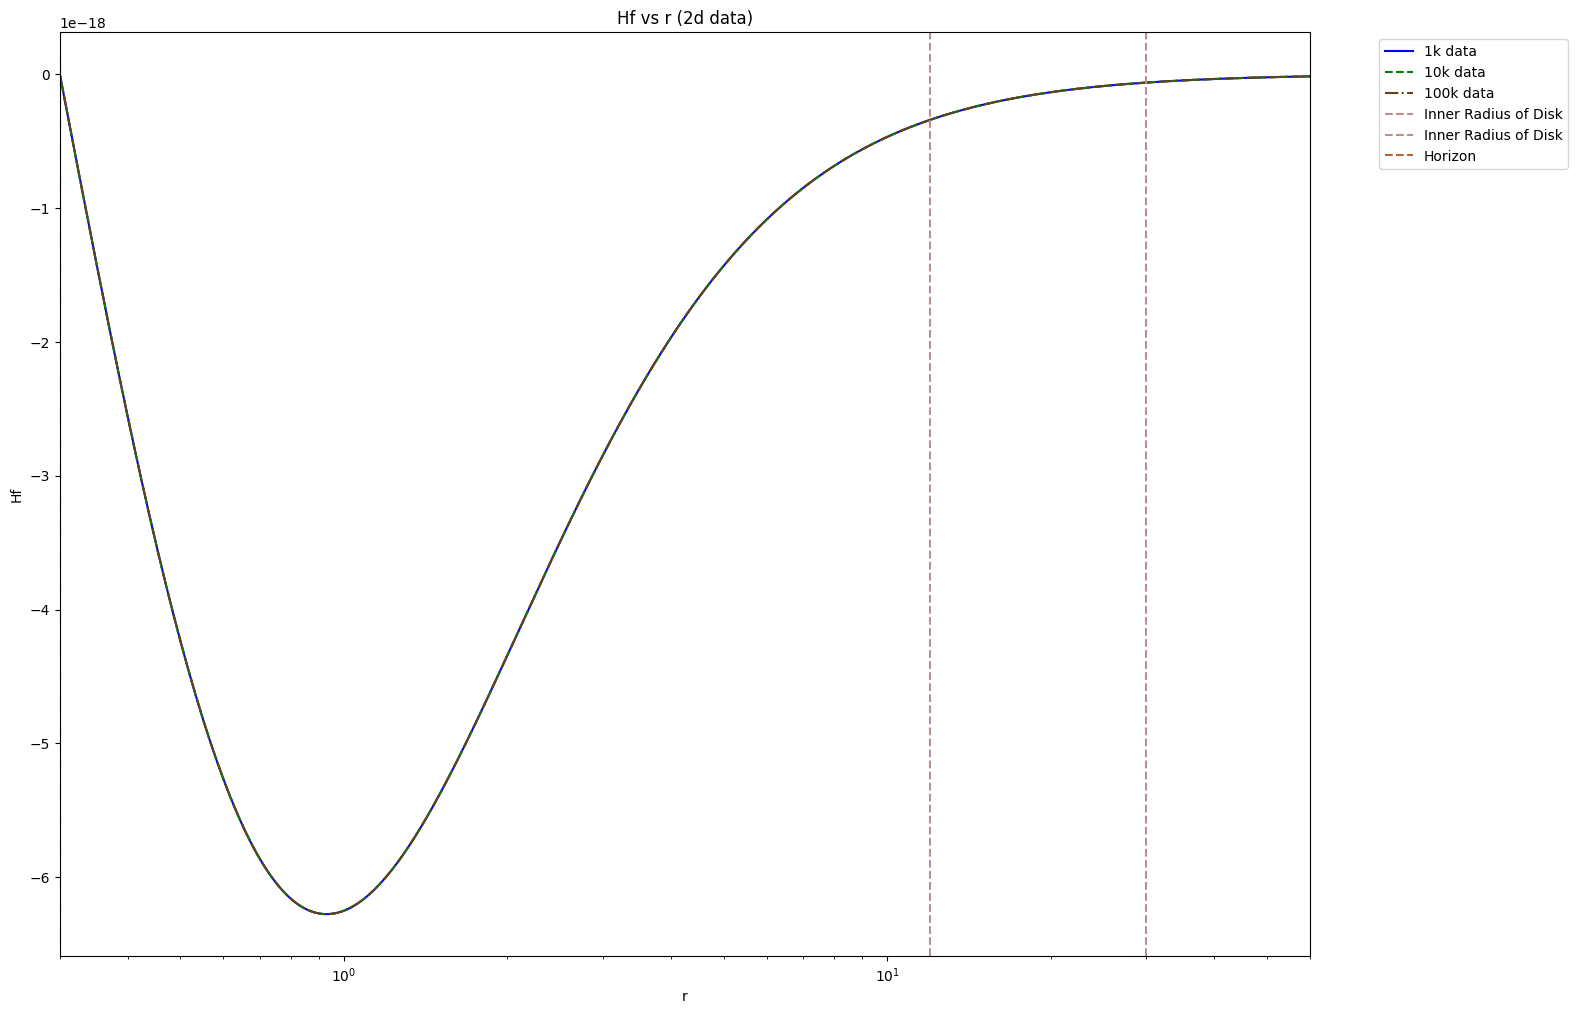

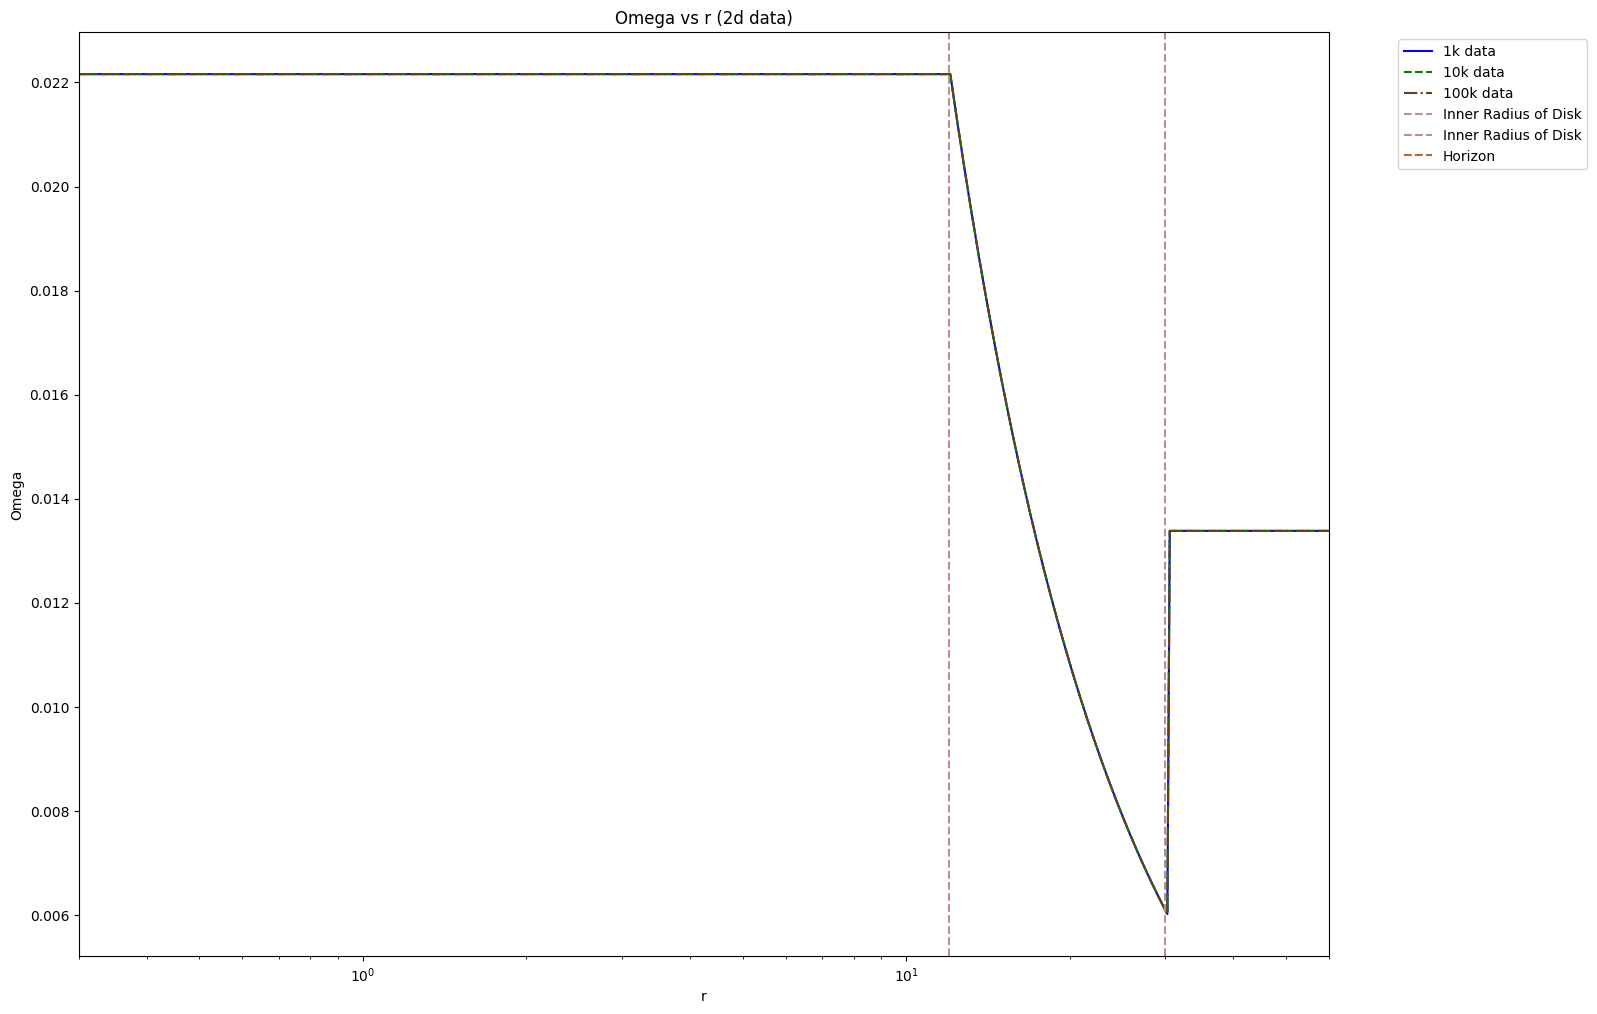

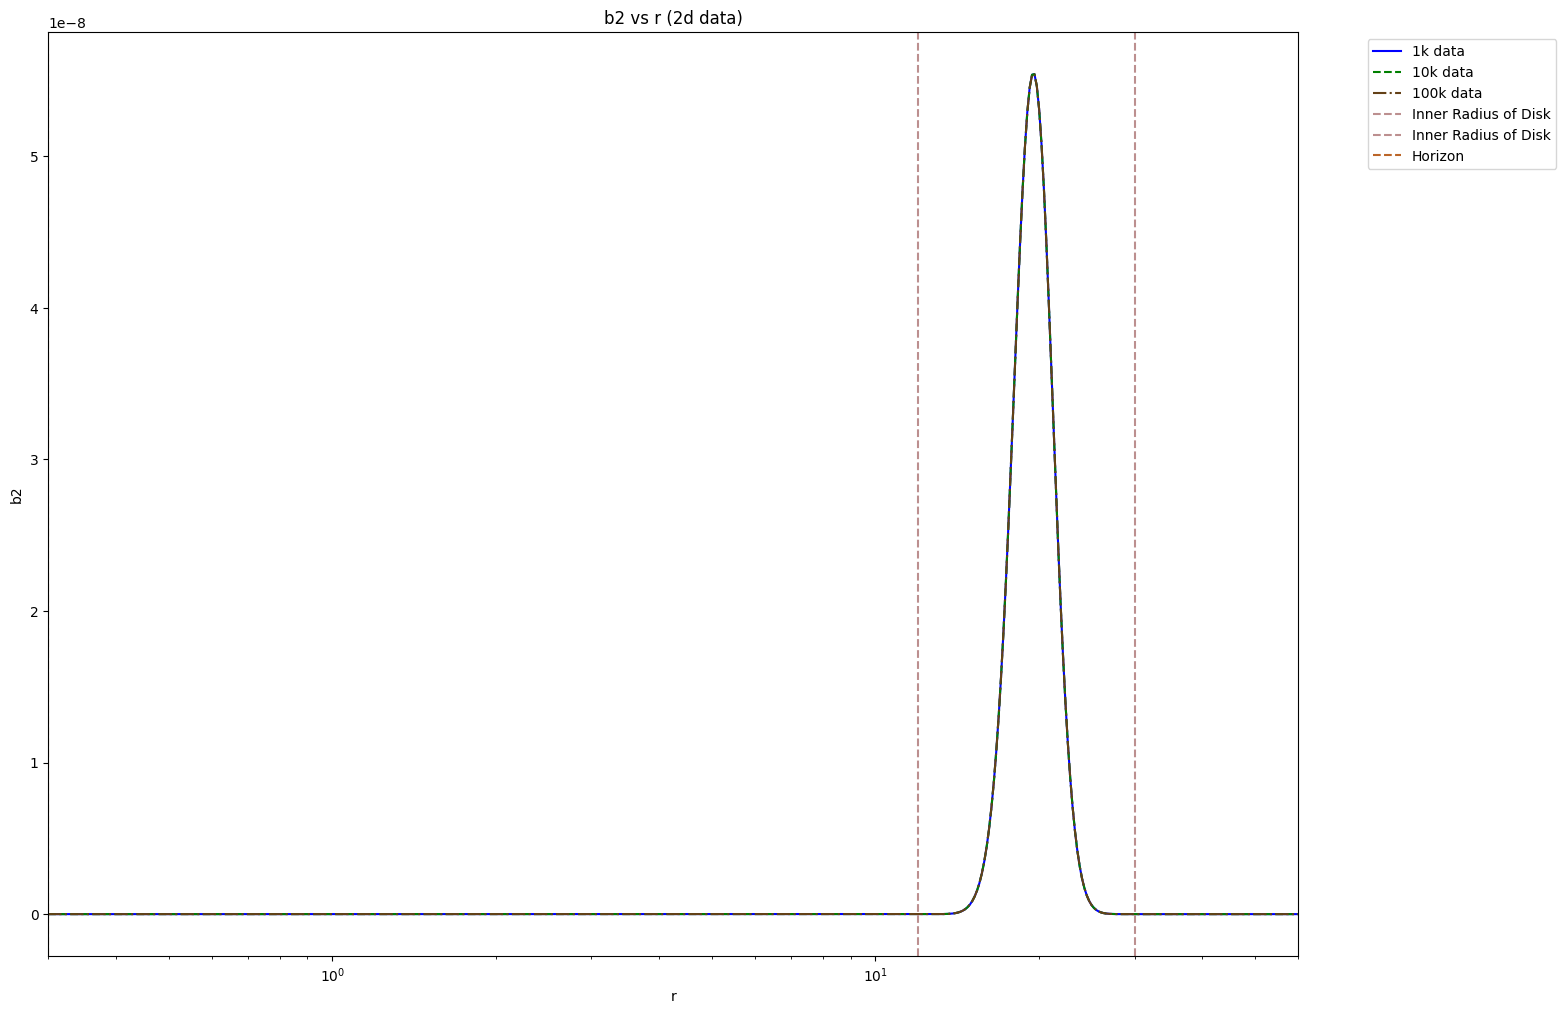

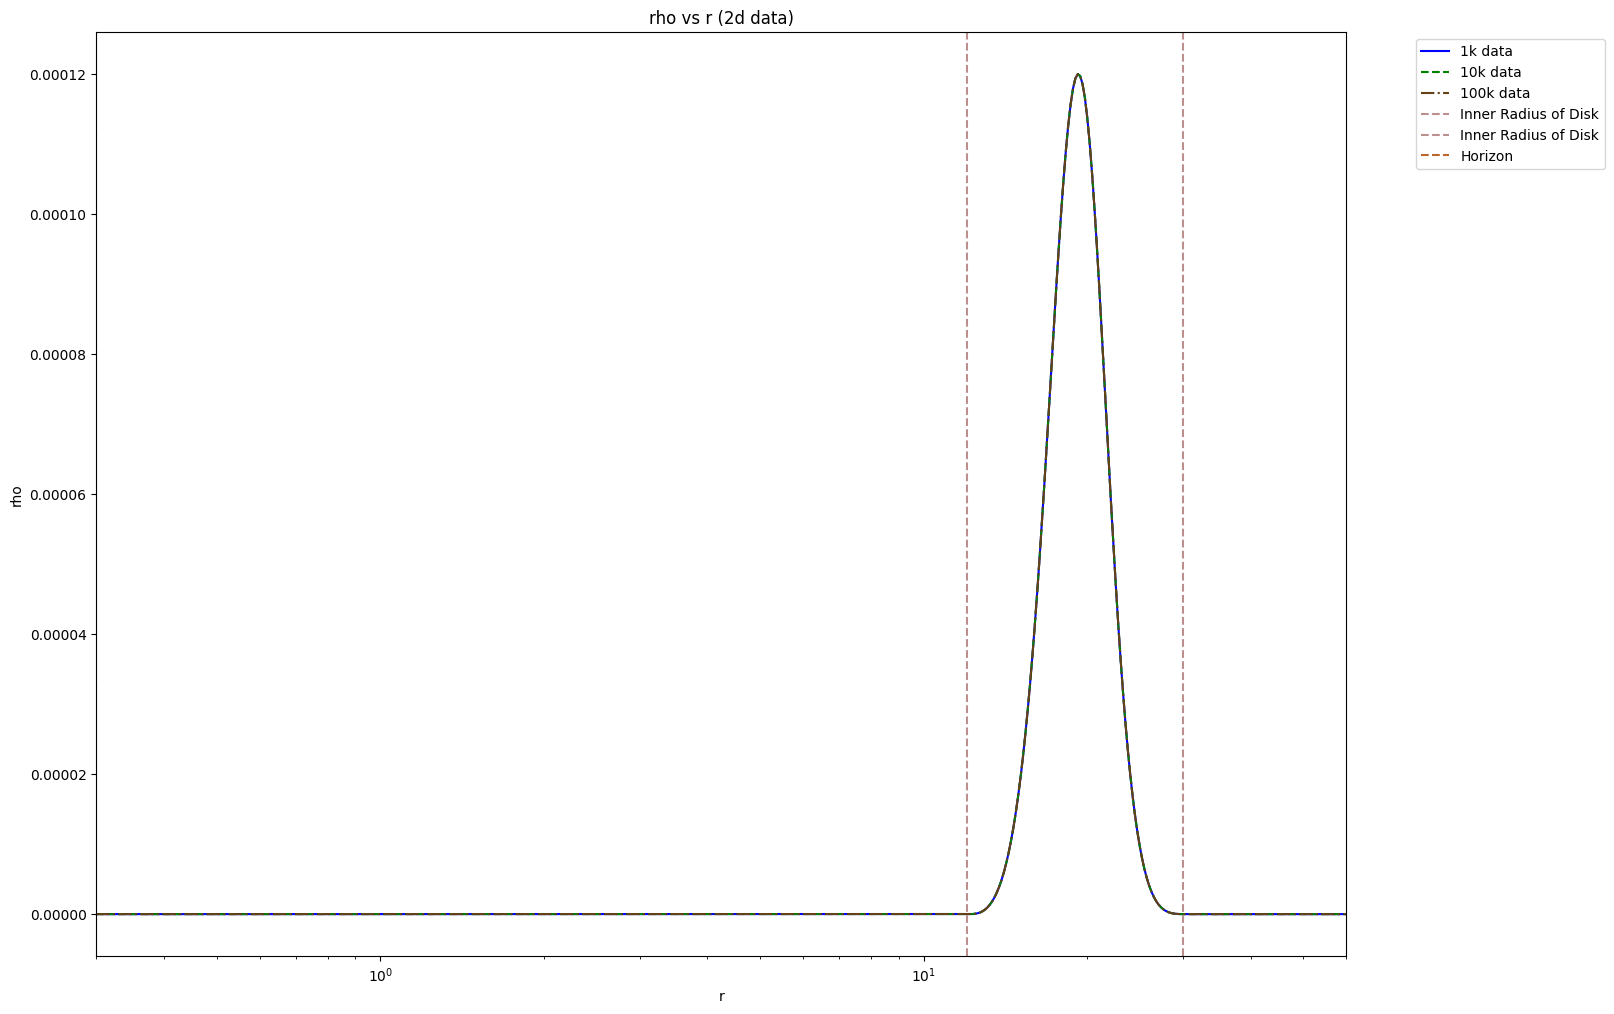

In [15]:
for col in column_names[4:]:
    fig, ax = plt.subplots(figsize=(20,12))
    plt.subplots_adjust(right=0.75)
    plt.xlim(0.3, 60)
    plt.xscale('log')
    plt.plot(df_2d_1k_new_xplane["r"], df_2d_1k_new_xplane[col],  color='blue', label="1k data")
    plt.plot(df_2d_10k_new_xplane["r"], df_2d_10k_new_xplane[col],  color='g', linestyle="--", label="10k data")
    plt.plot(df_2d_100k_new_xplane["r"], df_2d_100k_new_xplane[col], color='#644117', linestyle="-.", label="100k data")
    ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
    plt.ylabel(col)
    plt.xlabel("r")
    plt.title("{} vs r (2d data)".format(col))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("2ddatacomp{}.png".format(col))

In [13]:
df_2d_1k_new_xplane.sort_values(by=['r', 'theta'])
df_2d_10k_new_xplane.sort_values(by=['r', 'theta'])
df_2d_100k_new_xplane.sort_values(by=['r', 'theta'])

,x,z,r,theta,alpha,psi,q,betak,betat,dbetatdr,...,b2,rho,phi,y,gxx,gxy,gxz,gyy,gyz,gzz
201,0.300000,1.836970e-17,0.300000,1.570796,0.000000,2.589687,-2.145527e-01,-2.368790e-01,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,29.284046,0.0,0.0,44.976864,0.0,29.284046
403,0.306000,1.873710e-17,0.306000,1.570796,0.005905,2.564224,-2.145199e-01,-2.368421e-01,-3.578127e-09,-4.800713e-06,...,0.0,0.0,0.0,0.0,28.151046,0.0,0.0,43.233871,0.0,28.151046
605,0.312060,1.910816e-17,0.312060,1.570796,0.011753,2.539358,-2.144201e-01,-2.367319e-01,-5.840364e-08,-2.431721e-05,...,0.0,0.0,0.0,0.0,27.080245,0.0,0.0,41.581055,0.0,27.080245
807,0.318181,1.948294e-17,0.318181,1.570796,0.017547,2.515066,-2.142565e-01,-2.365507e-01,-3.016363e-07,-7.396758e-05,...,0.0,0.0,0.0,0.0,26.067317,0.0,0.0,40.012640,0.0,26.067317
1009,0.324362,1.986147e-17,0.324362,1.570796,0.023290,2.491327,-2.140320e-01,-2.363006e-01,-9.725936e-07,-1.222421e-04,...,0.0,0.0,0.0,0.0,25.108309,0.0,0.0,38.523281,0.0,25.108309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161195,1668.046118,1.021384e-13,1668.046118,1.570796,0.999065,1.000468,-3.275616e-07,-3.867179e-11,-1.307311e-09,2.334660e-12,...,0.0,0.0,0.0,0.0,1.001872,0.0,0.0,1.001873,0.0,1.001872
161397,1684.729579,1.031599e-13,1684.729579,1.570796,0.999074,1.000463,-3.209212e-07,-2.856718e-11,-1.269139e-09,2.243607e-12,...,0.0,0.0,0.0,0.0,1.001853,0.0,0.0,1.001854,0.0,1.001853
161599,1701.579875,1.041917e-13,1701.579875,1.570796,0.999083,1.000459,-3.144078e-07,-1.875944e-11,-1.232089e-09,2.156104e-12,...,0.0,0.0,0.0,0.0,1.001835,0.0,0.0,1.001836,0.0,1.001835
161801,1718.598674,1.052338e-13,1718.598674,1.570796,0.999092,1.000454,-3.080189e-07,-9.239859e-12,-1.196128e-09,2.072014e-12,...,0.0,0.0,0.0,0.0,1.001817,0.0,0.0,1.001818,0.0,1.001817


In [14]:
np.sqrt(np.float64(1) - np.float64(0.8)**2)/2

np.float64(0.29999999999999993)

In [16]:
df_3d = pd.read_hdf("/data/sjammi6/thesisproject/data/October_08_2024_22-13/3D_data/all_data_updated_jacobian.h5", key="df")
df_3d

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.300000,0.000000,0.000000,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.300000,0.000000,0.063467,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.300000,0.000000,0.126933,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.300000,0.000000,0.190400,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.300000,0.000000,0.253866,0.00000,-2.409219e-01,0.000000e+00,-0.0,2.447883,35.905663,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64761196,0.000052,1.570796,6.092786,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,1.351214e-07,...,1.145235e-10,9.789670e-26,0.0,0.0,-0.0,0.0,-0.0,-6.746229e-08,-3.500276e-07,0.0
64761197,0.000052,1.570796,6.156252,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,9.130724e-08,...,5.176602e-11,9.889629e-26,0.0,0.0,-0.0,0.0,-0.0,-4.512635e-08,-3.536016e-07,0.0
64761198,0.000052,1.570796,6.219719,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,4.602389e-08,...,1.307278e-11,9.949765e-26,0.0,0.0,-0.0,0.0,-0.0,-2.260869e-08,-3.557518e-07,0.0
64761199,0.000052,1.570796,6.283185,-0.99906,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,1.780928e-22,...,1.953525e-40,9.969838e-26,0.0,0.0,-0.0,0.0,-0.0,-8.730984e-23,-3.564695e-07,0.0


In [17]:
df_3d_xplane = df_3d[(df_3d.theta == dict(df_3d.theta.describe())["50%"]) & (df_3d.phi == dict(df_3d.phi.describe())["min"])]
df_3d_xplane = df_3d_xplane.sort_values(by="r").drop_duplicates()
df_3d_xplane.sort_values(by="r")
df_3d_xplane

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
64761100,0.000052,1.570796,0.0,-0.999060,-7.606844e-26,7.156935e-13,-0.0,1.000470,1.001882,0.0,...,0.0,9.969838e-26,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.564695e-07,0.0
48560700,0.000052,1.570796,0.0,-0.999052,-7.805547e-26,7.417337e-13,-0.0,1.000474,1.001897,0.0,...,0.0,1.007610e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.600348e-07,0.0
64720700,0.000053,1.570796,0.0,-0.999045,-8.007074e-26,7.684943e-13,-0.0,1.000478,1.001912,0.0,...,0.0,1.026929e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.636358e-07,0.0
64700500,0.000053,1.570796,0.0,-0.999037,-8.213442e-26,7.961853e-13,-0.0,1.000482,1.001927,0.0,...,0.0,1.052809e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.672728e-07,0.0
48500100,0.000054,1.570796,0.0,-0.999030,-8.425241e-26,8.248851e-13,-0.0,1.000485,1.001941,0.0,...,0.0,1.081161e-25,0.0,0.0,-0.0,0.0,-0.0,0.0,-3.709462e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119500,1668.046118,1.570796,0.0,0.999030,-8.425241e-26,8.248851e-13,-0.0,1.000485,1.001941,0.0,...,0.0,1.081161e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.709462e-07,0.0
32340100,1684.729579,1.570796,0.0,0.999037,-8.213442e-26,7.961853e-13,-0.0,1.000482,1.001927,0.0,...,0.0,1.052809e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.672728e-07,0.0
16159900,1701.579875,1.570796,0.0,0.999045,-8.007074e-26,7.684943e-13,-0.0,1.000478,1.001912,0.0,...,0.0,1.026929e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.636358e-07,0.0
16180100,1718.598674,1.570796,0.0,0.999052,-7.805547e-26,7.417337e-13,-0.0,1.000474,1.001897,0.0,...,0.0,1.007610e-25,0.0,0.0,0.0,-0.0,0.0,0.0,-3.600348e-07,0.0
